<h1> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;TASK 1</h1>

**TASK 1**: Harmony in Frames                                                      **(40 Marks)**


(a) Consider the set of sorted points $x_1, x_2, \ldots, x_n$ sampled independently and identically from Uniform distribution from range $0$ to $1$. For simplicity, let us look into problem where corresponding labels ($y_i$) to each $x_i, \forall i\in [n]$ is either positive ($1$) or negative ($0$).  


(b) Further, consider a class of hypothesis ($H_k$) that consider countable union of $k$ non-overlapping partitions (called frames). Particularly, for instance a set of such partitions is denoted as $P = \{[a_1, b_1], \ldots, [a_k, b_k]$ where $0 \le a_1 \le b_1 \le a_2 \le \ldots \le a_k \le b_k \le 1$. Then any hypothesis $h_P \in H_k$ is given as
<br>
<br>
$h_P = \begin{cases}
    1\ \ \  \text{   if } x \in [a_1, b_1] \text{ or }  [a_2, b_2] \text{ or } \ldots, [a_k, b_k] \\
    0\ \ \  \text{   otherwise }
\end{cases}$

(c) As you have a collection of data points $(x_1, y_1), \ldots, (x_n, y_n)$ where $x_i$'s are uniformly distributed on space $0$ to $1$, let us now look into probability distribution of labels $y_i$'s to each of the $x_i$'s i.e., the true distribution $P(x, y) = P(y | x) P(x)$ is given as below:
<br>
<br>
$\mathcal{P}(y= \text{positive} | x) = \begin{cases} 0.7\ \   \text{ if } x \in [0, 0.2] \cup  [0.4, 0.6] \cup \ldots, [0.8, 1] \\
0.2\ \  \text{ if } x \in (0.2, 0.4) \cup  (0.6, 0.8) \\
\end{cases}
$
<br><br>
and $\mathcal{P}(y= \text{negative} | x) = 1 - \mathcal{P}(y= \text{positive} | x)$.

<br><br>
Now, as you have gathered complete prerequisite knowledge for the question, let us look into the sub-tasks which needs to be performed as part of this lab assignment.  
<br><br>
We have provided you with a snippet [called PartitionRaja_Discover($\cdot$)] that returns the best possible tuple of $k$ partitions on given sorted list of $X$ values and corresponding labels $Y$ for a fixed $k$.
<br>
<br>

**SubTask 1**: Code the procedure SUBTASK1 that takes as input a list of partitions $P$, computes the true error and empirical error.  
                                          **(15 Marks + 5 Marks respectively)**

 Now, fix $k$=$3$ and vary number of data points  $n=10, 20, \ldots, 200$. For each value of $n$ find the mean and standard deviation of emprirical, true error over 10 independent runs. Plot these both error values against $n$.  
                                                                  **(7 Marks)**

 Discuss your findings in the report.                             **(3 Marks)**

<br>
<br>


**SubTask 2**: Sample a dataset of size $n=1500$. Find the best emprical risk minimizer hypothesis using code snippted provided for different $k$ values from $1, 2, 3, \ldots, 10$. Plot the mean and standard deviation of emprirical, true error over 10 independent runs. Plot these both error values against $k$.  
 **(7 Marks)**

Discuss your findings in the report.  Find the best $k^*$ and report your reason for choice of same.  **(3 Marks)**


<br>
<br>
NOTE: You have to complete the subroutines for completion of this question. Further, each independent run in Subtask 1 is referred as follows:<br><br>

import random<br>
import numpy as np<br>
seeds = [0,100,200,300]<br>
mean_over_n =[]<br>
std_over_n =[]<br>
<br>
for n in range(10, 210, 10):<br>
  &nbsp;&nbsp;&nbsp;&nbsp;answers =[]<br>
  &nbsp;&nbsp;&nbsp;&nbsp;for seed in seeds:<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;np.random.seed(seed)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;random.seed(seed)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ans = A()<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;answers.append(ans)<br>
  &nbsp;&nbsp;&nbsp;&nbsp;mean_over_n.append(np.mean(answers))<br>
  &nbsp;&nbsp;&nbsp;&nbsp;std_over_n.append(np.std(answers))<br>

Now plot these mean_over_n and std_over_n using error plots in matplotlib

<br>
<br>


In [394]:
import random
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

In [395]:
from numpy import *

def PartitionRaja_Discover(X, Y, k):

    assert all(array(X) == array(sorted(X))), "X must be sorted!"

    X = array(X)
    Y = array(Y)
    m = len(X)
    DP1 = [[None for j in range(k+1)] for i in range(m+1)]
    DP2 = zeros((m+1, k+1), dtype=int)

    cuml_sum_y = concatenate([[0], cumsum(Y)])

    DP2[:m+1,0] = cuml_sum_y

    for i in range(1, m+1):
        for j in range(1, k+1):
            choices = []
            for l in range(0,i+1):
                nxt_errs = DP2[l,j-1] + (cuml_sum_y[i]-cuml_sum_y[l]) + concatenate([[0], cumsum((-1)**(Y[arange(l, i)] == 1))])
                min_err = argmin(nxt_errs)
                choices.append((nxt_errs[min_err], (l, arange(l,i+1)[min_err])))

            DP2[i,j], DP1[i][j] = min(choices)

    good = []
    cur = DP1[m][k]
    for i in range(k,0,-1):
        good.append(cur)
        cur = DP1[cur[0]][i-1]
        if cur == None:
            break
    good = sorted(good)
    temp = concatenate([[0], X, [1]])
    reps = (temp[1:]+temp[:-1]) / 2.0
    partitions = [(reps[a], reps[b]) for a,b in good]

    return partitions

In [396]:
# ----- SubTask 1 -----

# Function to generate dataset (list of tuples)
def form_a_dataset(number_of_samples):
    dataset = []
    while(number_of_samples>0):
        x = round(random.uniform(0, 1), 2)
        y = random.randint(0, 2)
        dataset.append((x,y))
        number_of_samples-=1
    sorted_dataset = sorted(dataset, key=lambda x: x[0])
    return sorted_dataset

# Function to calculate empirical error
def find_empirical_error(partitions, X, Y):
    error = 0
    dataset_len = len(X)
    for i in range(0, dataset_len):
        x = X[i]
        y = Y[i]
        isPositive = False
        for partition in partitions:
            if partition[0] <= x and x <= partition[1]:
                isPositive = True
        if (isPositive == True and y == 0) or (isPositive == False and y == 1):
            error+=1
    return error

# Function to calculate true error
def find_true_error(partitions,X,Y):
    intervals = [(0.0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]
    error_probability = 0 
    for index, interval in enumerate(intervals):
        L = interval[0]
        R = interval[1]
        predicted_positive = 0
        for partition in partitions:
           l = partition[0]
           r = partition[1]
           if r < L:
               continue
           elif l > R:
               continue
           else:
               predicted_positive = predicted_positive + min(R, r) - max(L, l)
        predicted_negative = R - L - predicted_positive
        if index % 2 == 0:
            error_probability = error_probability + (0.7) * (predicted_negative) + (0.3) * (predicted_positive)
        else:
            error_probability = error_probability + (0.2) * (predicted_negative) + (0.8) * (predicted_positive)
    error = error_probability * len(X)
    return error

def SUBTASK1(partitions, X, Y):
    empirical_error = find_empirical_error(partitions, X, Y)
    true_error = find_true_error(partitions, X, Y)
    return [true_error, empirical_error]

In [ ]:
def plotGraph(X, Y, title, xlabel, ylabel):
    plt.plot(X, Y, marker='o', linestyle='-', color='b', label='Data Points')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()  
    plt.show()

In [ ]:
# Plotting graph wrt n
def plot_graph_wrt_n(N, empirical_error_mean_over_n, empirical_error_std_over_n, true_error_mean_over_n, true_error_std_over_n):
    title = 'Empirical_error_mean vs N'
    plotGraph(N, empirical_error_mean_over_n, title, 'N', 'Empirical_error_mean')
    
    title = 'Empirical_error_std vs N'
    plotGraph(N, empirical_error_std_over_n, title, 'N', 'Empirical_error_std')
    
    title = 'True_error_mean vs N'
    plotGraph(N, true_error_mean_over_n, title, 'N', 'True_error_mean')
    
    title = 'True_error_std vs N'
    plotGraph(N, true_error_std_over_n, title, 'N', 'True_error_std')
    
    plt.plot(N, true_error_mean_over_n, label='True_error_mean')
    plt.plot(N, empirical_error_mean_over_n, label='Empirical_error_mean')
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.title('Plot of Empirical_error_mean and True_error_mean against N')
    plt.legend()
    plt.show()

In [397]:
# Fixing k = 3 
k = 3

# Seeds for 10 independent run
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

empirical_error_mean_over_n =[]
empirical_error_std_over_n =[]
true_error_mean_over_n =[]
true_error_std_over_n =[]

N = []
for n in range(10, 210, 10):
    N.append(n)
    true_errors = []
    empirical_errors = []
    for seed in seeds:
        np.random.seed(seed)
        random.seed(seed)
        number_of_samples = n
        dataset = form_a_dataset(number_of_samples)
        X = [dataset_instance[0] for dataset_instance in dataset]
        Y = [dataset_instance[1] for dataset_instance in dataset]
        partitions = PartitionRaja_Discover(X, Y, k)
        [true_error, empirical_error] = SUBTASK1(partitions, X, Y)
        true_errors.append(true_error)
        empirical_errors.append(empirical_error)
    empirical_error_mean_over_n.append(np.mean(empirical_errors))
    empirical_error_std_over_n.append(np.std(empirical_errors))
    true_error_mean_over_n.append(np.mean(true_errors))
    true_error_std_over_n.append(np.std(true_errors))

plot_graph_wrt_n(N, empirical_error_mean_over_n, empirical_error_std_over_n, true_error_mean_over_n, true_error_std_over_n)

In [399]:
# ----- SubTask 2 -----

# Plotting of graphs wrt k
def plot_graph_wrt_k(K, empirical_error_mean_over_k, empirical_error_std_over_k, true_error_mean_over_k, true_error_std_over_k):
    title = 'Empirical_error_mean vs k'
    plotGraph(K, empirical_error_mean_over_k, title, 'K', 'Empirical_error_mean')
    
    title = 'Empirical_error_std vs k'
    plotGraph(K, empirical_error_std_over_k, title, 'K', 'Empirical_error_std')
    
    title = 'True_error_mean vs k'
    plotGraph(K, true_error_mean_over_k, title, 'K', 'True_error_mean')
    
    title = 'True_error_std vs k'
    plotGraph(K, true_error_std_over_k, title, 'K', 'True_error_std')

    plt.plot(K, true_error_mean_over_k, label='True_error_mean')
    plt.plot(K, empirical_error_mean_over_k, label='Empirical_error_mean')
    plt.xlabel('K')
    plt.ylabel('Error')
    plt.title('Plot of Empirical_error_mean and True_error_mean against K')
    plt.legend()
    plt.show()

def SUBTASK2(number_of_sample, k_max):
    
    empirical_error_mean_over_k =[]
    empirical_error_std_over_k =[]
    true_error_mean_over_k =[]
    true_error_std_over_k =[]
    
    seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

    K = [] 
    
    for k in range(1, k_max+1):
        K.append(k)
        true_errors = []
        empirical_errors = []
        
        for seed in seeds:
            np.random.seed(seed)
            random.seed(seed)
            
            # Generation of dataset
            dataset = form_a_dataset(number_of_samples)
            X = [dataset_instance[0] for dataset_instance in dataset]
            Y = [dataset_instance[1] for dataset_instance in dataset]
            
            partitions = PartitionRaja_Discover(X, Y, k)
            [true_error, empirical_error] = SUBTASK1(partitions, X, Y)
            true_errors.append(true_error)
            empirical_errors.append(empirical_error)
            
        empirical_error_mean_over_k.append(np.mean(empirical_errors))
        empirical_error_std_over_k.append(np.std(empirical_errors))
        true_error_mean_over_k.append(np.mean(true_errors))
        true_error_std_over_k.append(np.std(true_errors))

    plot_graph_wrt_k(K, empirical_error_mean_over_k, empirical_error_std_over_k, true_error_mean_over_k, true_error_std_over_k)

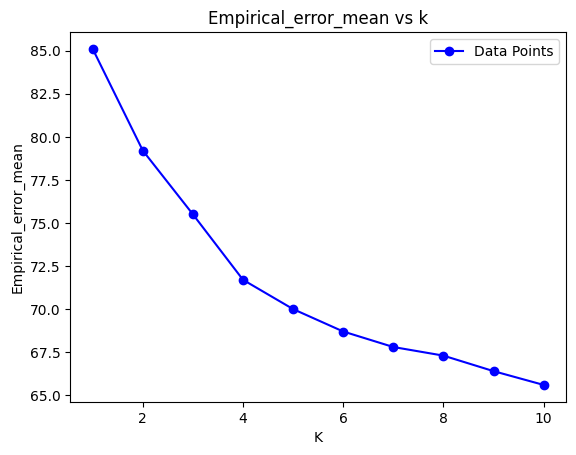

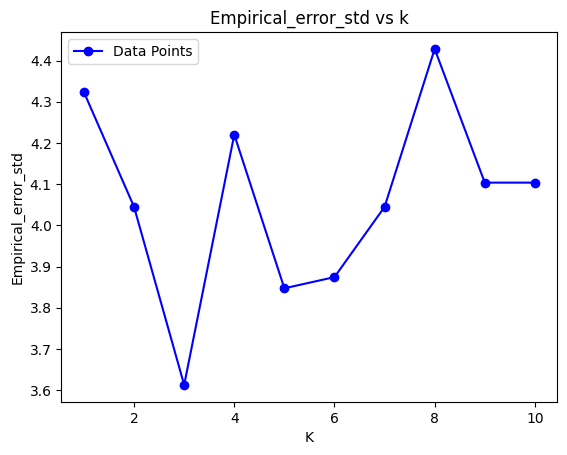

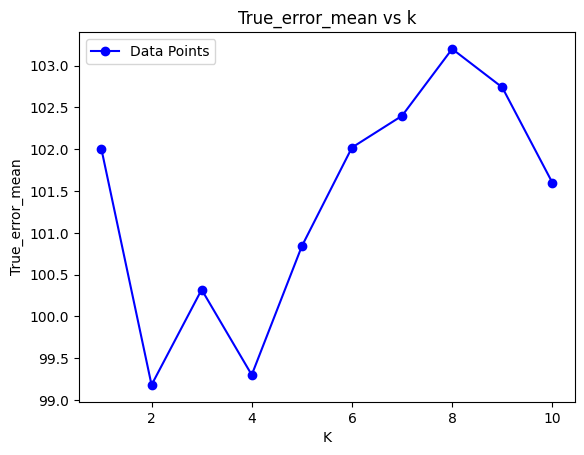

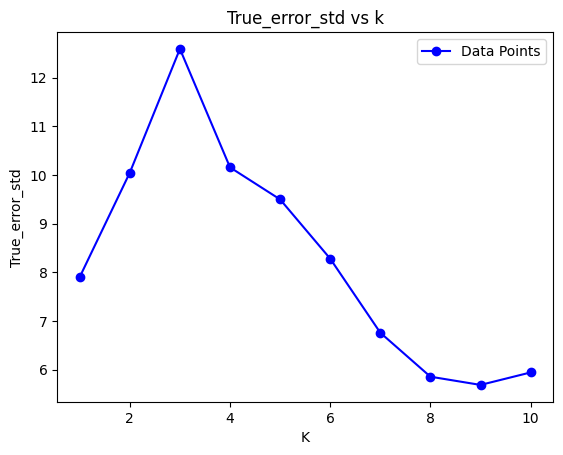

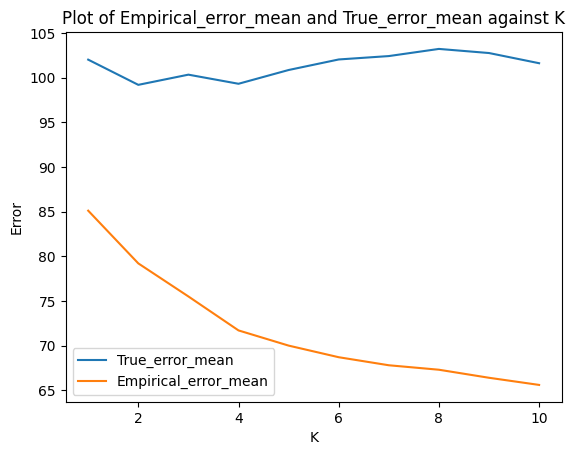

In [400]:
# Setting n = 200 and k_max = 10
number_of_samples = 200
k_max = 10
SUBTASK2(number_of_samples, k_max)

<h1> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;TASK 2</h1>

**TASK 2**:                                                      **(40 Marks)**

In this question, we will test the effect of different noise on the polynomial curve fitting with regression.

Let the given function is $f(x) = \frac{2cos(x)}{-\pi}+\frac{(2x)}{(2\pi)}+\frac{2cos(3x)}{(-3\pi)} + (z\times \text{Noise}$) where $x$ ranges from $-10$ to $10$  and $z$ is the scaling factor for the additive noise.  

1. Noise$\sim \mathcal{N}(\mu=0,\sigma=1)$ and added with a scaling factor of 0.1 in the function f(x). Perform the next steps using gaussian noise.</br>

  a. Generate $50$ data points from the given f(x) and gaussian noise.  **(1 Marks)**</br>
  b. Fit a polynomial regresser for the above generated data using gradient descent optimizer with momentum  **(8 Marks)**.
  
  Try it with multiple degrees of polynomial $\mathcal{M}$ where $\mathcal{M}$ = [1,20] and report the empirical error for each $\mathcal{M}$.  **(2 Marks)**</br>

  c. Report the best and worst fit degree along with proper observations and graphs.  **(2 Marks for graphs, 3 Marks for observations)**</br>

  d.  Repeat the previous experiments with more number of data points and report your findings.  **(2 Marks + 1 Marks)** </br>

  e. Plot the bias and variance with respect to $M$.  **(2 Marks)**</br>
  f. Plot the bias and variance with respect to number of datapoints. **(2 Marks)**</br>


2. Noise$\sim \mathcal{P}(\lambda=2)$ and added with a scaling factor of 0.1 in the function f(x). Perform the next steps using poisson noise.</br>

  a. Generate $50$ data points from the given f(x) and possion noise. **(1 Marks)**</br>
  b. Fit a polynomial regresser for the above generated data using gradient descent optimizer with momentum. **(Already graded)**
  Try it with multiple degrees of polynomial $\mathcal{M}$ where $\mathcal{M}$ = [1,20] and report the empirical error for each $\mathcal{M}$. **(2 Marks)** </br>
  c. Report the best and worst fit degree along with proper observations and graphs. **(2 Marks for graphs, 3 Marks for observations)**</br>
  d.  Repeat the previous experiments with more number of data points and report your findings.**(2 Marks + 1 Marks)** </br>
  e. Plot the bias and variance with respect to $M$. **(2 Marks)**</br>
  f. Plot the bias and variance with respect to number of datapoints. **(2 Marks)**</br>

3. Compare for both types of noise added to the function f(x) and report your observations. **(2 Marks)**

Note: Code the gradient descent from scratch for full credit. 50% marks will be deducted if you use inbuilt library functions for optimizer and regression.

For momentum based gradient descent optimizer refer the following equations as hint:
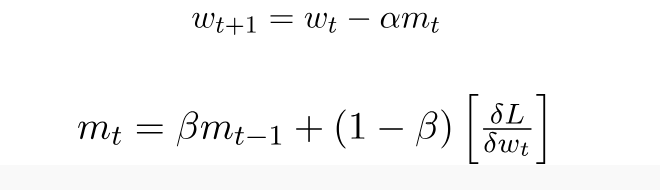

here, $w_{t+1}$: weights at time $(t+1)$ </br>
$w_t$: weights at time $t$</br>
$\alpha$ : learning rate </br>
$m_t$: momentum at time $t$</br>
$m_{t-1}$: momentum at time $(t-1)$ where $m_0$=0</br>
$\beta$ : moving average parameter (constant) </br>
$\delta L$/$\delta w$: Loss $L$ derivative w.r.t weights $w$ </br>

**Use of sci-kit or any direct implementation of linear regression is striclty probhibted as it will lead to 50% penalty. You can use numpy and pandas.** </br>
Write your code by creating cells below.


Solution with Gaussian Noise

In [401]:
def find_error(Y_true,Y_pred):
  pass

In [402]:
def generate_data_with_gaussian_noise(scaling_factor, total_number_of_data_points):

  pass



In [403]:
def polynomial_regressor_gaus(degree):
  pass


In [404]:
def run_experiment_with_different_total_number_of_points_gaus():

  pass

In [405]:
def find_bias_and_variance():
  pass

Solution with Poison Noise

In [406]:
def generate_data_with_gaussian_noise(scaling_factor, total_number_of_data_points):

  pass


In [407]:
def polynomial_regressor_poison(degree):
  pass


In [408]:
def run_experiment_with_different_total_number_of_points_poison():

  pass

In [409]:
def run_experiment_with_different_degrees_poison(max_degree):

  pass

<h1> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;TASK 3</h1>

**TASK 3**:                                                      **(20 Marks)**
Given a concept class $h$ which comprises of axis-aligned rectangles with
$a \leq x \leq b$ and $c \leq y \leq d$ where $a$, $b$, $c$, $d$ are real numbers with condition 0 $\leq p \leq q \leq $ 100 and 0 $\leq r \leq s \leq $ 100. Implement the following:

1. Generate a random concept $h$ with ${p,q,r,s}$ parameters for a rectangle.</br> **(1 Marks)**
2. Generate a dataset with atleast 100 i.i.d samples ($x$,$y$) drawn from uniform distribution. Label them with the generated concept $h$ in the previous step.
The samples inside the rectangle should be labelled as 1 and 0 otherwise. The points on the boundary of rectangle should be labelled as 1. **(1+1=2 Marks)**

Note: Make sure to have good enough points for both labels 1 and 0.</br>
3. Write a function to generate the hypothesis $h_1$ for the given data and calculate its empirical error. **(6+2=8 Marks)**</br>
4. Plot the concept $h$ (true hypothesis) and  generated hypothesis $h_1$ on the generated data. **(1 Marks)**</br>
5. Now, again sample 100 more points from the uniform distribution and check the empirical error with hypothesis $h_1$. **(1+1=2 Marks)**</br>
6. Add these 100 samples from step 5. in the original dataset, and reestimate the hypothesis $h_2$ and calculate error on $h_2$. **(1+1=2 Marks)** <br>
7. Plot $h$, $h_1$ ,$h_2$ on the dataset and report your observations. **(1 + 3 =4Marks)**


In [410]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [411]:
# The numbers are rounded to 5 decimal places.
# This generates a random hypothesis of axis aligned rectangles
# ----- 3a -------

def generate_random_concept_h():
    p = round(random.uniform(1, 100), 5)
    q = round(random.uniform(1, 100), 5)
    r = round(random.uniform(1, 100), 5)
    s = round(random.uniform(1, 100), 5)
    return [ min(p, q), max(p, q), min(r, s), max(r, s) ]

In [412]:
random.seed(110)
random_concept_h_parameter = generate_random_concept_h()
print("Random Concept h:")
print("p = ", random_concept_h_parameter[0])
print("q = ", random_concept_h_parameter[1])
print("r = ", random_concept_h_parameter[2])
print("s = ", random_concept_h_parameter[3])

Random Concept h:
p =  39.41544
q =  93.49193
r =  25.52858
s =  82.34248


In [413]:
# This generates a random dataset 
# ----- 3b -------

def generate_dataset(n):
    dataset=[]
    while(n>0):
        x = round(random.uniform(1, 100), 5)
        y = round(random.uniform(1, 100), 5)
        dataset.append([x,y])
        n-=1
    return dataset

In [414]:
# This returns label according to hypothesis
def predicate(x, y, h_parameters):
    p = h_parameters[0]
    q = h_parameters[1]
    r = h_parameters[2]
    s = h_parameters[3]
    if p <= x and x <= q and r <= y and y <= s:
        return 1
    return 0

In [415]:
# This is labelling function that label the whole dataset acc. to given hypothesis
def labeling_function(dataset, h_parameters):
    labeled_dataset=[]
    for data_instance in dataset:
        x = data_instance[0]
        y = data_instance[1]
        fxy = predicate(x, y, h_parameters)
        labeled_dataset.append([x, y, fxy])
    return labeled_dataset

In [416]:
dataset100 = generate_dataset(100)
labeled_dataset100 = labeling_function(dataset100, random_concept_h_parameter)

In [417]:
# function to generate ERM hypothesis
# ----- 3c ------

def generate_hypothesis(labeled_dataset):
    p_pred=100
    q_pred=0
    r_pred=100
    s_pred=0
    for dataset_instance in labeled_dataset:
        if dataset_instance[2]==1:
            p_pred = min(p_pred,dataset_instance[0])
            q_pred = max(q_pred,dataset_instance[0])
            r_pred = min(r_pred,dataset_instance[1])
            s_pred = max(s_pred,dataset_instance[1])
    return [p_pred, q_pred, r_pred, s_pred]

In [418]:
# This calculates the empirical error
def calculate_emperical_error(hypothesis_parameter, labeled_dataset):
    error=0
    predicted_label_dataset = labeling_function(labeled_dataset, hypothesis_parameter)
    size = len(labeled_dataset)
    for i in range(size):
        if predicted_label_dataset[i][2] != labeled_dataset[i][2]:
            error+=1
    return error

In [419]:
hypothesis_h1_parameter = generate_hypothesis(labeled_dataset100)
print("Hypothesis h1:")
print("predicted p= ", hypothesis_h1_parameter[0])
print("predicted q = ", hypothesis_h1_parameter[1])
print("predicted r = ", hypothesis_h1_parameter[2])
print("predicted s = ", hypothesis_h1_parameter[3])

Hypothesis h1:
predicted p=  42.25789
predicted q =  90.49548
predicted r =  27.16308
predicted s =  82.23595


In [420]:
h1_labeled_dataset100 = labeling_function(dataset100, hypothesis_h1_parameter)
emperical_error100= calculate_emperical_error(random_concept_h_parameter, h1_labeled_dataset100)
print("Empirical Error of hypothesis h1 and 100 sample points: ", emperical_error100)

Empirical Error of hypothesis h1 and 100 sample points:  0


From true hypothesis :


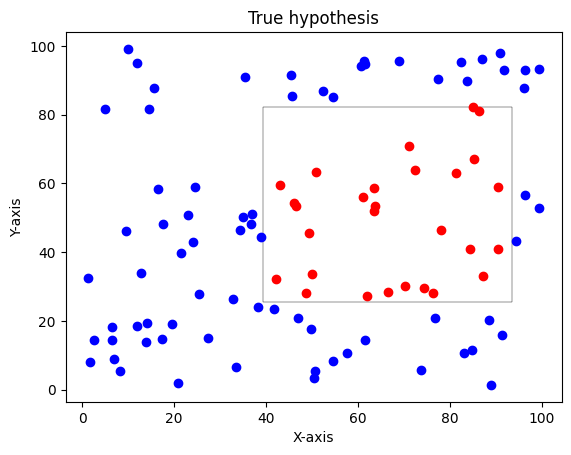

From hypothesis h1:


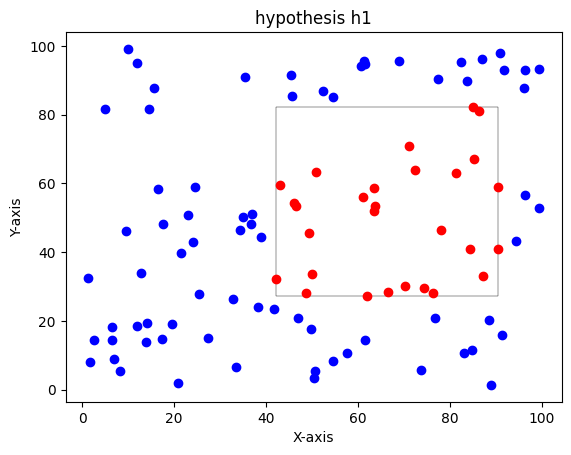

In [421]:
# Plot the concept h (true hypothesis) and h1 generated hypothesis on the generated data
# Comparision between h and h1
# ----- 3d ------

print("From true hypothesis :")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((random_concept_h_parameter[0], random_concept_h_parameter[2]), random_concept_h_parameter[1]-random_concept_h_parameter[0], random_concept_h_parameter[3]-random_concept_h_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in labeled_dataset100:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('True hypothesis')
plt.show()

print("From hypothesis h1:")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((hypothesis_h1_parameter[0], hypothesis_h1_parameter[2]), hypothesis_h1_parameter[1]-hypothesis_h1_parameter[0], hypothesis_h1_parameter[3]-hypothesis_h1_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in h1_labeled_dataset100:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('hypothesis h1')
plt.show()

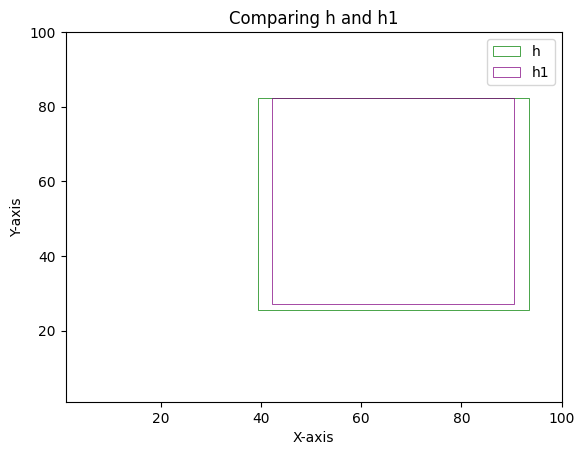

In [422]:
fig, ax = plt.subplots()
rectangle_h = patches.Rectangle((random_concept_h_parameter[0], random_concept_h_parameter[2]), random_concept_h_parameter[1]-random_concept_h_parameter[0], random_concept_h_parameter[3]-random_concept_h_parameter[2], linewidth=0.5, edgecolor='green', facecolor='none', label='h')
ax.add_patch(rectangle_h)
rectangle_h1 = patches.Rectangle((hypothesis_h1_parameter[0], hypothesis_h1_parameter[2]), hypothesis_h1_parameter[1]-hypothesis_h1_parameter[0], hypothesis_h1_parameter[3]-hypothesis_h1_parameter[2], linewidth=0.5, edgecolor='purple', facecolor='none', label='h1')
ax.add_patch(rectangle_h1)

ax.set_xlim(1, 100)
ax.set_ylim(1, 100)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Comparing h and h1')
plt.legend()
plt.show()

In [423]:
# sample 100 more points from the uniform distribution and check the empirical error with hypothesis h1
# ----- 3e -----

dataset200 = dataset100 + generate_dataset(100)
h1_labeled_dataset200 = labeling_function(dataset200, hypothesis_h1_parameter)
emperical_error200= calculate_emperical_error(random_concept_h_parameter, h1_labeled_dataset200)
print("Empirical Error of hypothesis h1 and 200 sample points: ", emperical_error200)

Empirical Error of hypothesis h1 and 200 sample points:  5


In [424]:
# Add these 100 samples from step 5. in the original dataset, and reestimate the hypothesis h2 and calculate error on h2 
# ----- 3f ------

labeled_dataset200 = labeling_function(dataset200, random_concept_h_parameter)
hypothesis_h2_parameter = generate_hypothesis(labeled_dataset200)
print("Hypothesis h2:")
print("predicted p= ", hypothesis_h2_parameter[0])
print("predicted q = ", hypothesis_h2_parameter[1])
print("predicted r = ", hypothesis_h2_parameter[2])
print("predicted s = ", hypothesis_h2_parameter[3])
h2_labeled_dataset200 = labeling_function(dataset200, hypothesis_h2_parameter)
emperical_error200 = calculate_emperical_error(random_concept_h_parameter, h2_labeled_dataset200)
print("Empirical Error of hypothesis h2 and 200 sample points:", emperical_error200)

Hypothesis h2:
predicted p=  39.84924
predicted q =  92.59509
predicted r =  26.73445
predicted s =  82.23595
Empirical Error of hypothesis h2 and 200 sample points: 0


From true hypothesis :


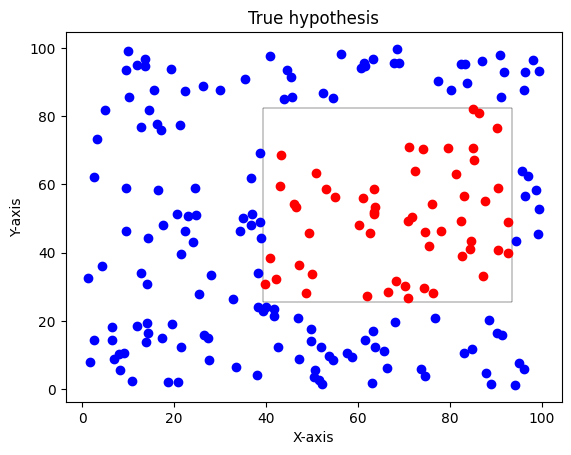

From hypothesis h1:


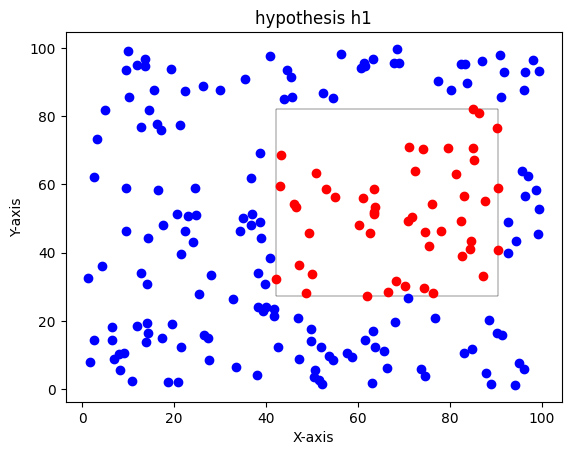

From hypothesis h2:


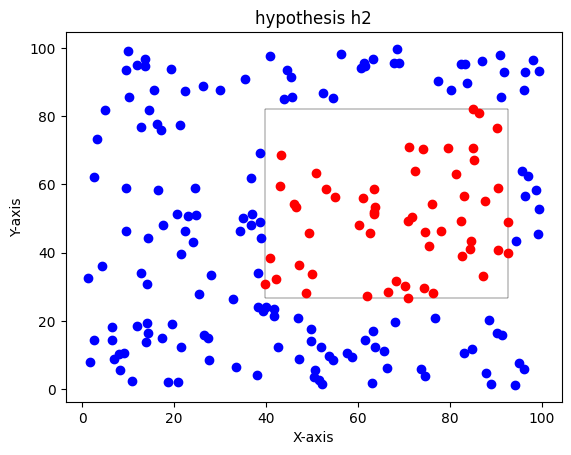

In [425]:
# Plot h, h1, h2 on the dataset and report your observations. 
# Comparision between h, h1 and h2
# ----- 3g ------

print("From true hypothesis :")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((random_concept_h_parameter[0], random_concept_h_parameter[2]), random_concept_h_parameter[1]-random_concept_h_parameter[0], random_concept_h_parameter[3]-random_concept_h_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in labeled_dataset200:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('True hypothesis')
plt.show()

print("From hypothesis h1:")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((hypothesis_h1_parameter[0], hypothesis_h1_parameter[2]), hypothesis_h1_parameter[1]-hypothesis_h1_parameter[0], hypothesis_h1_parameter[3]-hypothesis_h1_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in h1_labeled_dataset200:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('hypothesis h1')
plt.show()

print("From hypothesis h2:")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((hypothesis_h2_parameter[0], hypothesis_h2_parameter[2]), hypothesis_h2_parameter[1]-hypothesis_h2_parameter[0], hypothesis_h2_parameter[3]-hypothesis_h2_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in h2_labeled_dataset200:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('hypothesis h2')
plt.show()

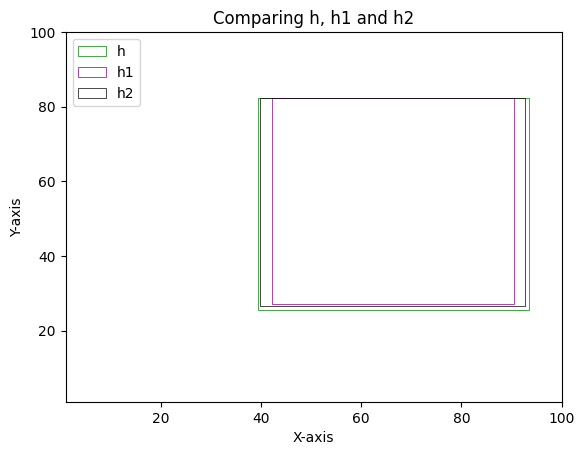

In [426]:
fig, ax = plt.subplots()
rectangle_h = patches.Rectangle((random_concept_h_parameter[0], random_concept_h_parameter[2]), random_concept_h_parameter[1]-random_concept_h_parameter[0], random_concept_h_parameter[3]-random_concept_h_parameter[2], linewidth=0.5, edgecolor='green', facecolor='none', label='h')
ax.add_patch(rectangle_h)
rectangle_h1 = patches.Rectangle((hypothesis_h1_parameter[0], hypothesis_h1_parameter[2]), hypothesis_h1_parameter[1]-hypothesis_h1_parameter[0], hypothesis_h1_parameter[3]-hypothesis_h1_parameter[2], linewidth=0.5, edgecolor='purple', facecolor='none', label='h1')
ax.add_patch(rectangle_h1)
rectangle_h2 = patches.Rectangle((hypothesis_h2_parameter[0], hypothesis_h2_parameter[2]), hypothesis_h2_parameter[1]-hypothesis_h2_parameter[0], hypothesis_h2_parameter[3]-hypothesis_h2_parameter[2], linewidth=0.5, edgecolor='black', facecolor='none', label='h2')
ax.add_patch(rectangle_h2)

ax.set_xlim(1, 100)
ax.set_ylim(1, 100)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Comparing h, h1 and h2')
plt.legend()
plt.show()

## DO PREPARE A SEPARATE REPORT (in PDF format) for all your observations in each question. You can report any other observations as well and use your creativity to understand the concepts.